# Economic Data Analysis with Fred & Pandas

In [22]:
#!pip install fredapi

In [23]:
import fredapi as Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = "9dd01b638e731f4100af1f1100f92e0c"


# 1. Create The Fred Object

In [24]:
fred = Fred(api_key=fred_key)

# 2. Pull and Join Multiple Data Series

In [25]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [26]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [27]:
cols_to_drop = []
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis=1)

In [28]:
uemp_states = uemp_results.copy()  #.drop('UNRATE', axis=1)
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [29]:
# Plot States Unemployment Rate
px.line(uemp_states)

In [30]:
uemp_states.reset_index(inplace=True)
uemp_states.rename(columns={'index':'Year'}, inplace=True)

uemp_states

,Year,California,Texas,Florida,New York,Michigan,Ohio,Pennsylvania,Alabama,Illinois,Massachusetts,North Carolina,Minnesota,Colorado,New Jersey,Oregon,Virginia,Arkansas,Tennessee,Arizona,Kentucky,South Carolina,Georgia,Wisconsin,West Virginia,New Mexico,Utah,Missouri,Washington,Louisiana,Alaska,Indiana,Maryland,Iowa,Connecticut,Nevada,Kansas,Oklahoma,Nebraska,the District of Columbia,North Dakota,Hawaii,Mississippi,Montana,Idaho,Maine,Delaware,South Dakota,Wyoming,Puerto Rico,Vermont,New Hampshire,Rhode Island
0,1976-01-01,9.2,5.8,9.7,10.3,9.9,8.1,8.0,6.6,6.6,10.5,6.4,6.0,5.8,10.3,9.5,6.1,7.3,6.0,10.2,5.6,7.4,8.4,5.8,7.5,8.6,5.8,5.9,8.5,6.3,7.1,6.6,6.4,4.3,9.8,9.2,4.2,5.8,3.3,8.7,3.4,9.8,6.7,5.8,5.6,8.7,8.0,3.3,4.1,19.6,8.6,6.5,7.8
1,1976-02-01,9.2,5.8,9.7,10.3,9.9,8.1,8.1,6.6,6.6,10.5,6.4,6.0,5.7,10.3,9.5,6.1,7.3,6.0,10.2,5.6,7.4,8.4,5.8,7.5,8.7,5.9,5.9,8.5,6.3,7.1,6.6,6.4,4.3,9.8,9.2,4.2,5.8,3.3,8.7,3.4,9.8,6.7,5.8,5.6,8.7,8.0,3.3,4.1,19.5,8.6,6.5,7.8
2,1976-03-01,9.1,5.9,9.6,10.2,9.9,8.1,8.1,6.6,6.6,10.5,6.4,5.9,5.7,10.3,9.4,6.1,7.3,6.0,10.1,5.6,7.3,8.4,5.7,7.5,8.7,5.8,5.9,8.4,6.3,7.0,6.5,6.4,4.3,9.8,9.2,4.2,5.8,3.3,8.6,3.4,9.8,6.6,5.8,5.6,8.6,8.0,3.2,4.1,19.3,8.6,6.5,7.7
3,1976-04-01,9.1,5.9,9.5,10.2,9.8,8.0,8.1,6.5,6.6,10.3,6.3,5.8,5.6,10.3,9.2,6.0,7.2,6.0,10.0,5.6,7.2,8.3,5.6,7.5,8.6,5.8,6.0,8.5,6.4,6.9,6.3,6.4,4.2,9.6,9.0,4.2,5.8,3.2,8.5,3.5,9.7,6.4,5.8,5.6,8.6,8.1,3.1,4.0,19.0,8.6,6.5,7.7
4,1976-05-01,9.0,5.9,9.3,10.1,9.6,7.8,8.1,6.4,6.6,10.1,6.1,5.7,5.6,10.3,9.1,5.9,7.1,5.9,9.8,5.5,7.0,8.1,5.5,7.4,8.6,5.7,6.0,8.5,6.5,6.9,6.0,6.5,4.1,9.4,8.9,4.2,5.7,3.1,8.4,3.6,9.4,6.3,5.8,5.6,8.5,8.3,3.1,3.9,18.9,8.5,6.5,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,2023-01-01,4.2,3.9,2.6,4.2,4.3,4.0,4.3,2.6,4.5,3.5,3.8,2.9,2.8,3.4,4.8,3.2,3.4,3.5,3.8,3.9,3.2,3.1,2.9,3.9,3.5,2.4,2.7,4.6,3.5,3.8,3.1,3.0,3.0,3.9,5.5,2.9,3.1,2.5,4.5,2.1,3.6,3.9,2.5,2.7,2.9,4.6,2.1,3.9,6.0,2.9,2.8,3.1
563,2023-02-01,4.4,4.0,2.6,4.2,4.3,3.9,4.4,2.5,4.5,3.7,3.6,3.0,2.9,3.5,4.7,3.2,3.2,3.5,3.7,3.9,3.2,3.1,2.7,3.7,3.6,2.4,2.6,4.6,3.6,3.8,3.1,2.9,2.9,4.0,5.5,2.9,3.0,2.3,4.7,2.1,3.6,3.7,2.4,2.6,2.8,4.6,2.1,3.8,6.0,2.8,2.7,3.1
564,2023-03-01,4.4,4.0,2.6,4.1,4.1,3.8,4.2,2.3,4.4,3.5,3.5,2.8,2.8,3.5,4.4,3.2,3.0,3.4,3.5,3.8,3.2,3.1,2.5,3.4,3.5,2.4,2.5,4.5,3.6,3.7,3.1,2.7,2.8,3.9,5.5,2.9,3.0,2.1,4.8,2.1,3.5,3.5,2.3,2.6,2.6,4.4,1.9,3.7,6.0,2.7,2.4,3.1
565,2023-04-01,4.5,4.0,2.6,4.0,3.8,3.7,4.1,2.2,4.2,3.1,3.4,2.8,2.8,3.5,4.0,3.1,2.8,3.3,3.4,3.7,3.1,3.1,2.4,3.3,3.5,2.3,2.5,4.3,3.6,3.7,3.0,2.5,2.7,3.8,5.4,2.9,2.9,2.0,5.0,2.1,3.3,3.4,2.3,2.6,2.4,4.3,1.9,3.5,6.0,2.4,2.1,3.0


In [39]:
df = uemp_states

 # 3. TIME SERIES - ARIMA model


In [40]:
# Assuming 'Year' is already in int64 format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df = df.set_index('Year')

In [41]:
state_columns = df.columns

state_predictions = {}

for state in state_columns:
    train_size = int(len(df[state]) * 0.8)
    train_data = df[state].iloc[:train_size]
    test_data = df[state].iloc[train_size:]
    
df['US_Average'] = df[state_columns].mean(axis=1)

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your DataFrame is named 'df' with the 'Year' column already set as the index

# Select the state for which you want to build the ARIMA model
state_to_predict = 'California'
state_data = df[state_to_predict]

# Split the data into training and testing sets
train_size = int(len(state_data) * 0.8)
train_data = state_data.iloc[:train_size]
test_data = state_data.iloc[train_size:]


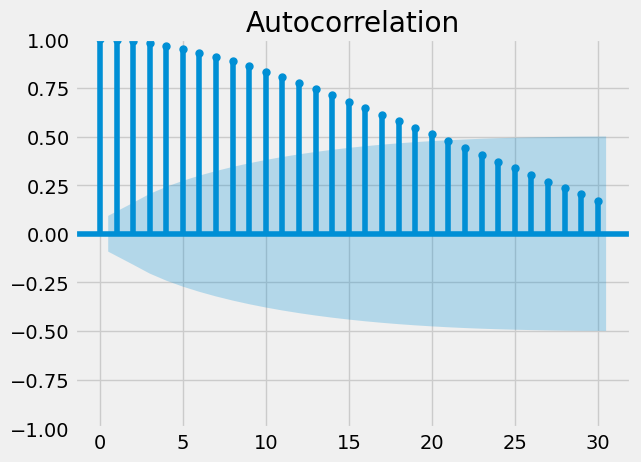

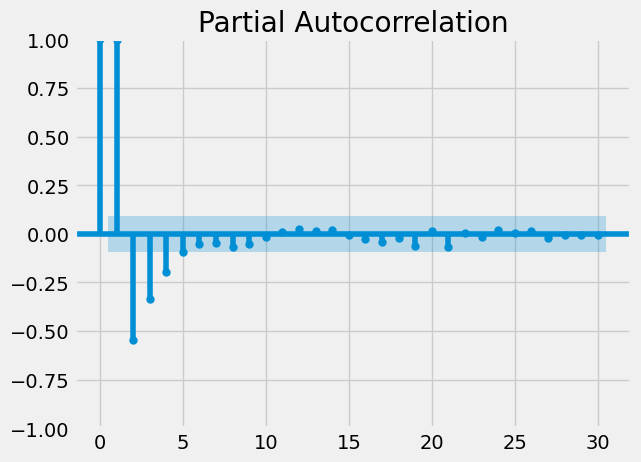

In [43]:
# Plot ACF and PACF to determine the order (p, d, q) of the ARIMA model
plot_acf(train_data, lags=30)
plot_pacf(train_data, lags=30)
plt.show()

In [45]:
from pmdarima.arima import auto_arima

# Find the appropriate ARIMA order using auto_arima
model = auto_arima(train_data, seasonal=True, suppress_warnings=True, stepwise=True)

# Get the best ARIMA order from the auto_arima result
order = model.order

# Print the best ARIMA order
print("Best ARIMA Order (p, d, q):", order)   

Best ARIMA Order (p, d, q): (2, 1, 2)


In [46]:
# Fit the ARIMA model
p, d, q = 2, 1, 2  # Replace these values with the order determined from ACF and PACF plots
arima_model = ARIMA(train_data, order=(p, d, q))
arima_fit = arima_model.fit()

# Make predictions
predictions = arima_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)


c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



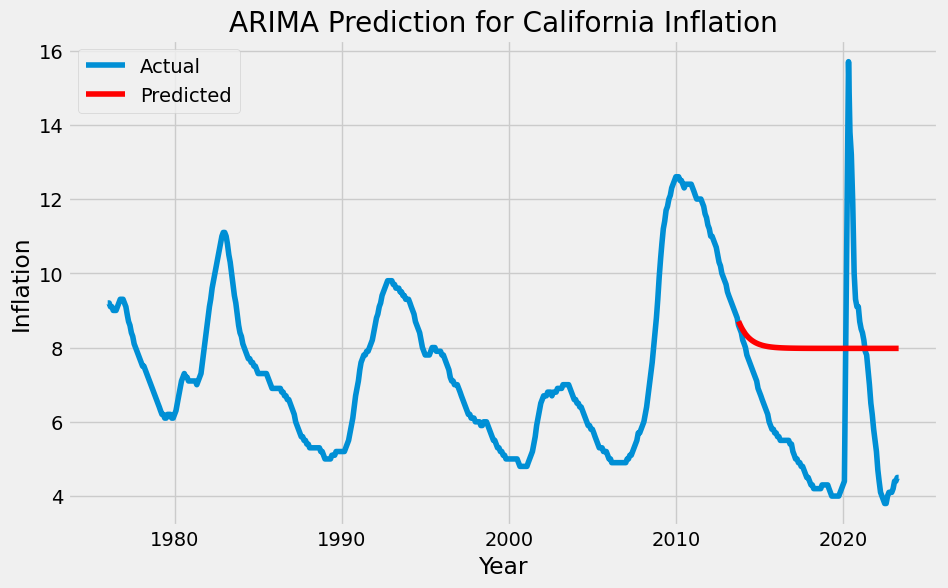

In [47]:
# Visualize the actual vs. predicted inflation for the state
plt.figure(figsize=(10, 6))
plt.plot(df.index, state_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', color='red')
plt.title(f'ARIMA Prediction for {state_to_predict} Inflation')
plt.xlabel('Year')
plt.ylabel('Inflation')
plt.legend()
plt.show()

# 4. Create and fit the Prophet model


In [83]:
from prophet import Prophet
df = uemp_states.copy()
inflation_data = df

In [84]:
# Select the state for which you want to build the Prophet model (e.g., California)
state_to_predict = 'California'
state_data = inflation_data[['Year', state_to_predict]].copy()
state_data

,Year,California
0,1976-01-01,9.2
1,1976-02-01,9.2
2,1976-03-01,9.1
3,1976-04-01,9.1
4,1976-05-01,9.0
...,...,...
562,2023-01-01,4.2
563,2023-02-01,4.4
564,2023-03-01,4.4
565,2023-04-01,4.5


In [85]:
# Rename columns to 'ds' and 'y' as required by Prophet
state_data.rename(columns={'Year': 'ds', state_to_predict: 'y'}, inplace=True)
state_data

,ds,y
0,1976-01-01,9.2
1,1976-02-01,9.2
2,1976-03-01,9.1
3,1976-04-01,9.1
4,1976-05-01,9.0
...,...,...
562,2023-01-01,4.2
563,2023-02-01,4.4
564,2023-03-01,4.4
565,2023-04-01,4.5


In [86]:
# Create and fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(state_data)

13:41:36 - cmdstanpy - INFO - Chain [1] start processing
13:41:36 - cmdstanpy - INFO - Chain [1] done processing


In [87]:
# Create a future DataFrame for prediction (next 12 months)
future = prophet_model.make_future_dataframe(periods=12, freq='M')

# Make predictions
forecast = prophet_model.predict(future)

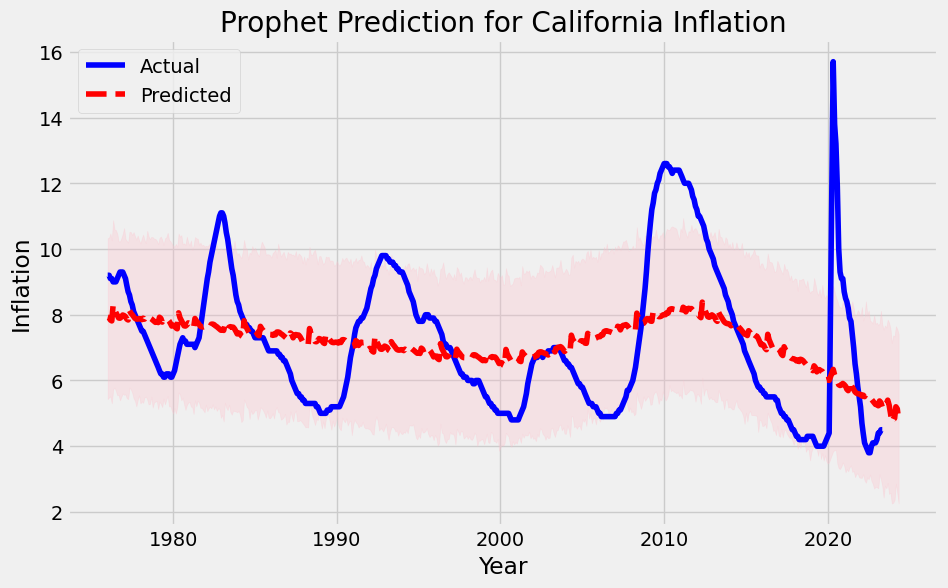

In [88]:
# Visualize the actual vs. predicted inflation for the state
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(state_data['ds'], state_data['y'], 'b-', label='Actual')
ax.plot(forecast['ds'], forecast['yhat'], 'r--', label='Predicted')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')
plt.title(f'Prophet Prediction for {state_to_predict} Inflation')
plt.show()

# The End